In [3]:
import pandas as pd
import numpy as np
import gc
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
# This path is user-specific since the image features are too large to store in GitHub.
img_features_path = '/home/tstrebel/assets/rsna-pneumonia/rsna-img-features.csv'

In [58]:
df = pd.read_csv(img_features_path, index_col='index')

df_train_val = df[df.split.isin(['train', 'val'])]
df_test = df[df.split == 'test']

del df

_ = gc.collect()

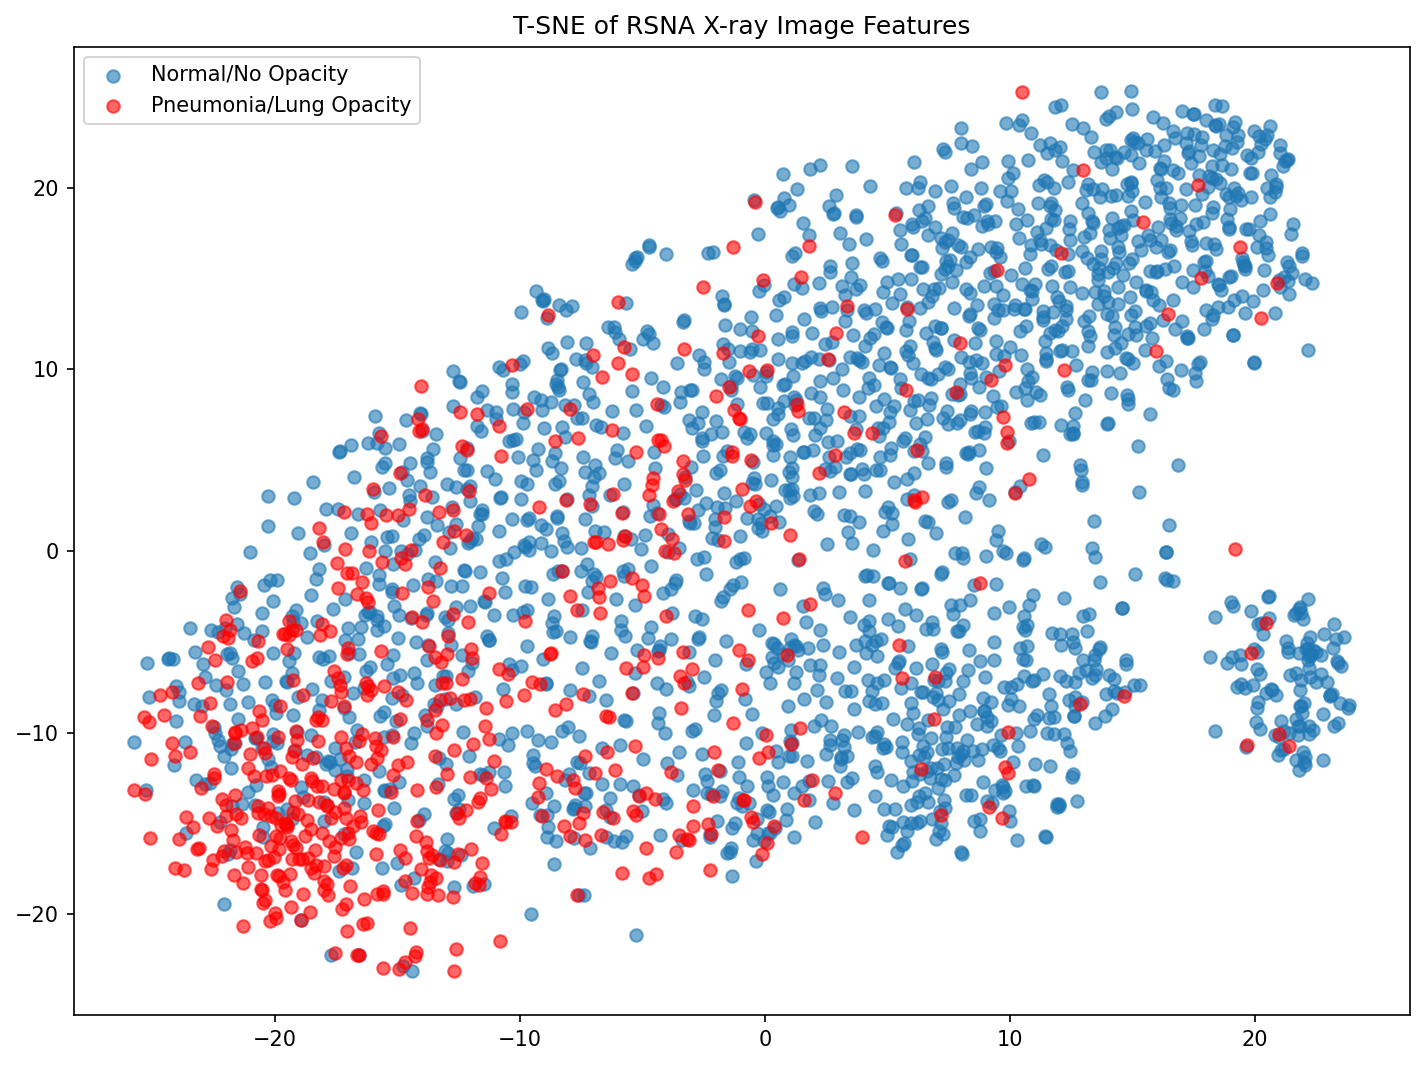

In [11]:
def plot_tsne(save_path=None):
    targets = df_test.iloc[:, -2]

    tsne = TSNE(n_components=2, 
                perplexity=50,
                early_exaggeration=50, 
                learning_rate=10, 
                n_jobs=-1
               ).fit_transform(df_test.iloc[:, 1:-2])

    ix_0 = np.where(targets == 0)[0]
    ix_1 = np.where(targets == 1)[0]

    figsize = np.array([6.4, 4.8]) * 1.5

    _ = plt.figure(dpi=150, figsize=figsize)
    plt.scatter(tsne[ix_0, 0], tsne[ix_0, 1], alpha=.6, label='Normal/No Opacity')
    plt.scatter(tsne[ix_1, 0], tsne[ix_1, 1], alpha=.6, color='red', label='Pneumonia/Lung Opacity')
    plt.title('T-SNE of RSNA X-ray Image Features')
    plt.legend()
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='png', orientation='landscape')
    plt.show()
    
# plot_tsne(save_path='/home/tstrebel/repos/umich-mads-capstone-project/figures/tsne-rnsa-image-features.png')